In [34]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [35]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import sys
import os
sys.path.append(os.path.abspath(".."))

from ModelComponents.spectroArchitectures import CNN_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.training import train
from ModelComponents.utils import plot_training_curves

In [36]:
datasets_path = "../../tp_tap_new/datasets"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")

results_path = "../results/CNN_spectro_equilibre" # changer l'emplacement du dossier en fonction du modèle entraîné
checkpoint_path = os.path.join(results_path,"model.pth")
training_plot_save_path = os.path.join(results_path,"Performance.png")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_CNN = CNN_spectro().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_CNN.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 15
batch_size = 128
noise_prob_train = 0.8
noise_prob_test = 0

In [37]:
data_train = FolderAudioDataset(os.path.join(preprocessed_path,"train"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_train)
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)


data_test = FolderAudioDataset(os.path.join(preprocessed_path,"test"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_test)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [38]:
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(model_CNN, train_loader, test_loader, criterion, optimizer, checkpoint_path, device, num_epochs, scheduler)

Epoch [1/15]
Train Loss: 1.4109, Train Acc: 48.66%
Test Loss: 1.1061, Test Acc: 58.72%

Best model saved with accuracy: 58.72%
Epoch [2/15]
Train Loss: 0.8827, Train Acc: 66.11%
Test Loss: 0.7409, Test Acc: 72.20%

Best model saved with accuracy: 72.20%
Epoch [3/15]
Train Loss: 0.6989, Train Acc: 74.03%
Test Loss: 1.2128, Test Acc: 65.22%

Epoch [4/15]
Train Loss: 1.0490, Train Acc: 64.76%
Test Loss: 0.7778, Test Acc: 73.28%

Best model saved with accuracy: 73.28%
Epoch [5/15]
Train Loss: 0.7054, Train Acc: 74.78%
Test Loss: 0.6177, Test Acc: 79.12%

Best model saved with accuracy: 79.12%
Epoch [6/15]
Train Loss: 0.5847, Train Acc: 79.36%
Test Loss: 0.5758, Test Acc: 80.30%

Best model saved with accuracy: 80.30%
Epoch [7/15]
Train Loss: 0.5565, Train Acc: 80.57%
Test Loss: 0.5470, Test Acc: 81.15%

Best model saved with accuracy: 81.15%
Epoch [8/15]
Train Loss: 0.5444, Train Acc: 80.78%
Test Loss: 0.5657, Test Acc: 80.63%

Epoch [9/15]
Train Loss: 0.5324, Train Acc: 81.16%
Test Loss: 

Plot saved to ../results/CNN_spectro_equilibre/Performance.png


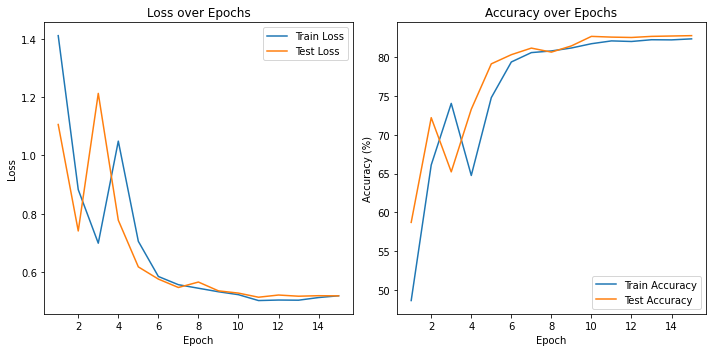

In [39]:
plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list, num_epochs, training_plot_save_path)